In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Data processing and visualization
Load abalone.csv dataset, perform exploratory analysis on the dataset. Clean the data NA-s and from uninformative columns if any.

In [53]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


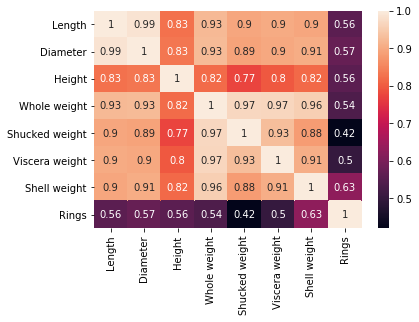

In [12]:
sns.heatmap(df.corr(),annot=True)#We can drop colum Diameter 

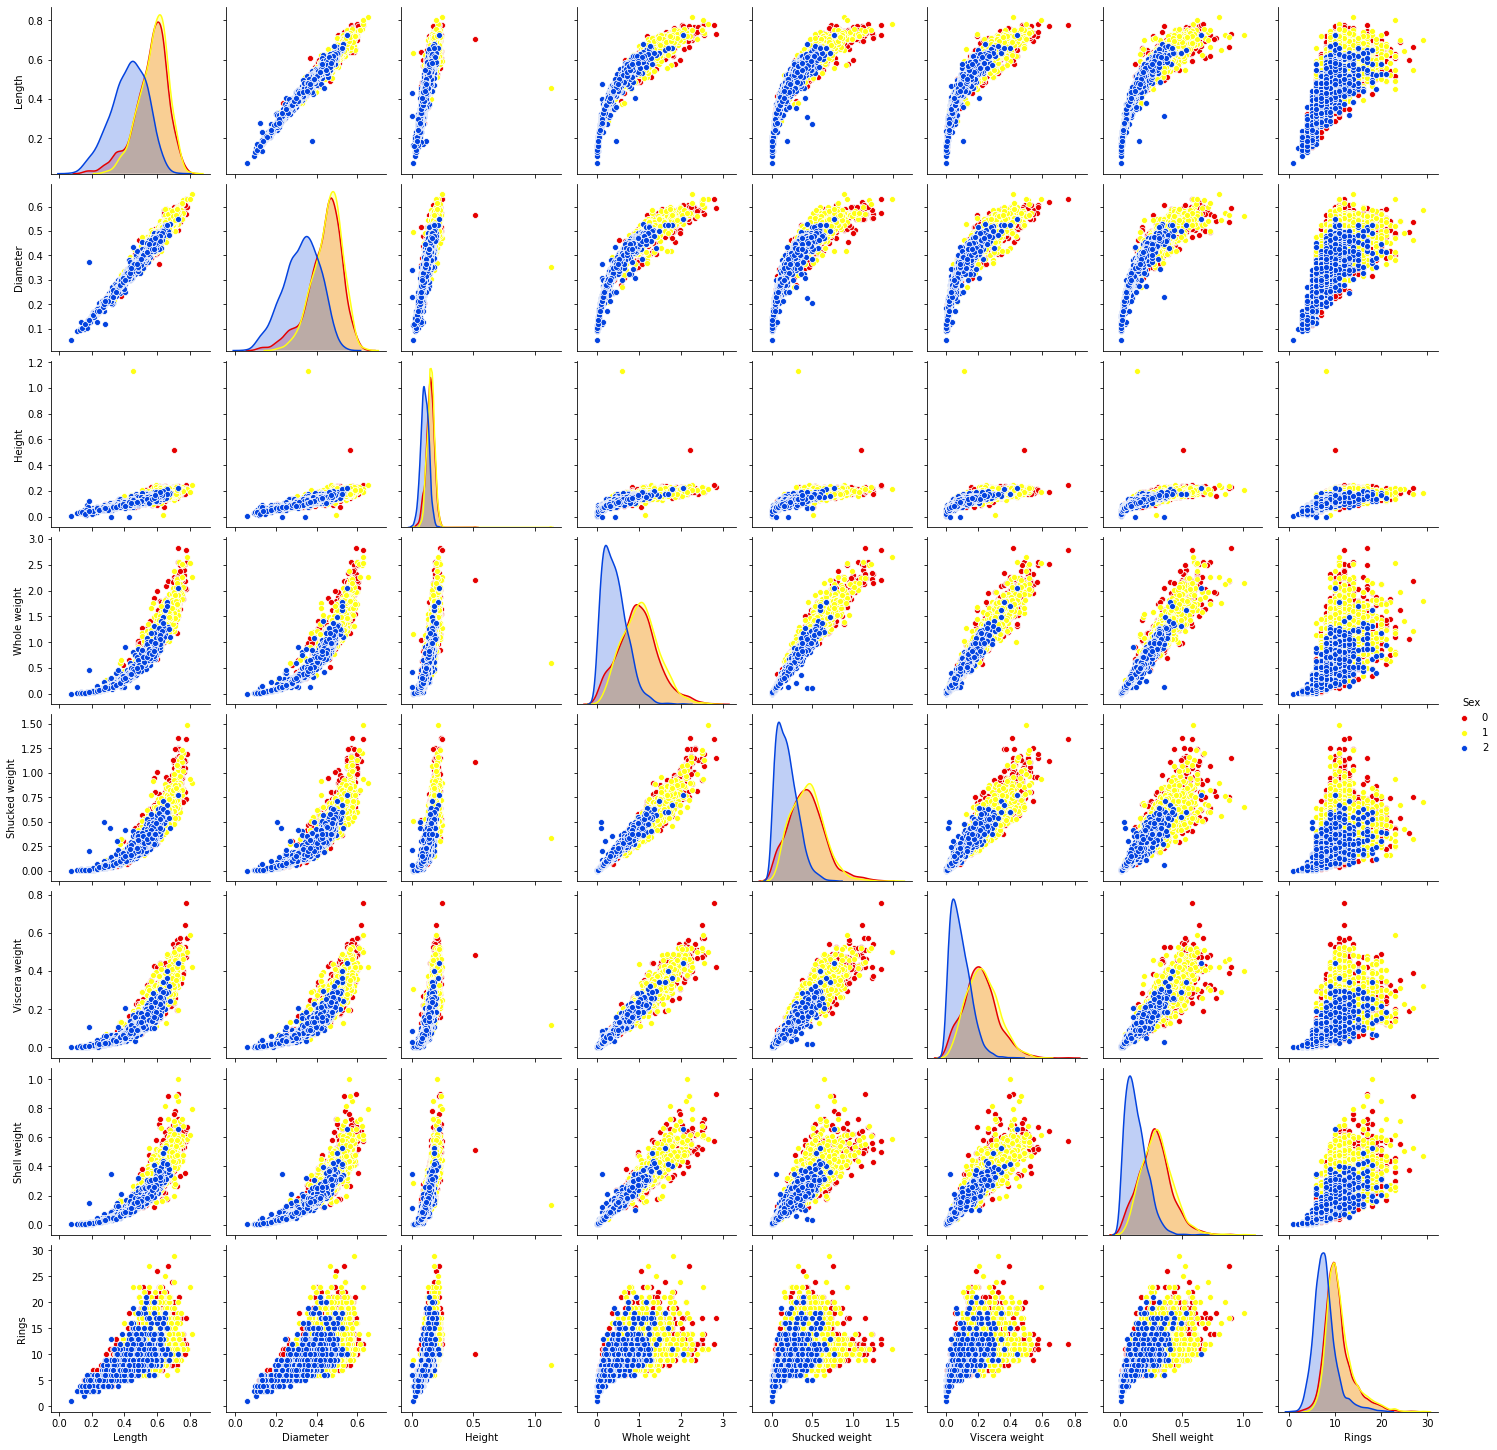

In [138]:
colors = ['red', 'yellow', 'blue']
sns.pairplot(df,  hue='Sex',palette=sns.xkcd_palette(colors))
plt.show()

In [102]:
df1=df.drop('Diameter', axis=1)


## 1. Fitting SVM
In this task we will try to predict the gender of an abalone snail. In the dataset we have three classes: "M" - male, "F"-female, "I" - infant.
1. Change the target variable from categorical to numeric.
2. Perform train/test split with ratio 85/15.
3. Reduce the training set to 2 dimensions and make a scatter plot, by coloring the points according to target variable. What do you think can SVM with linear kernel get good results?
4. Choose the best parameters for SVM and fit a model with that best params, report the accuracy and f1-score on the test set.

In [131]:
target_col = 'Sex'
df.loc[df[target_col] == 'M', 'Sex'] = 0
df.loc[df[target_col] == 'F', 'Sex'] = 1
df.loc[df[target_col] == 'I', 'Sex'] = 2
df[target_col] = df[target_col].astype(int)


In [103]:
target_col = 'Sex'
df1.loc[df1[target_col] == 'M', 'Sex'] = 0
df1.loc[df1[target_col] == 'F', 'Sex'] = 1
df1.loc[df1[target_col] == 'I', 'Sex'] = 2
df1[target_col] = df1[target_col].astype(int)

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['Sex'])],df['Sex'], test_size=0.15, random_state=0)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [104]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(df1[df1.columns.difference(['Sex'])],df1['Sex'], test_size=0.15, random_state=0)

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train1)
X_test1=scaler.transform(X_test1)

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE()

tsne_transformed = tsne.fit_transform(X_train)


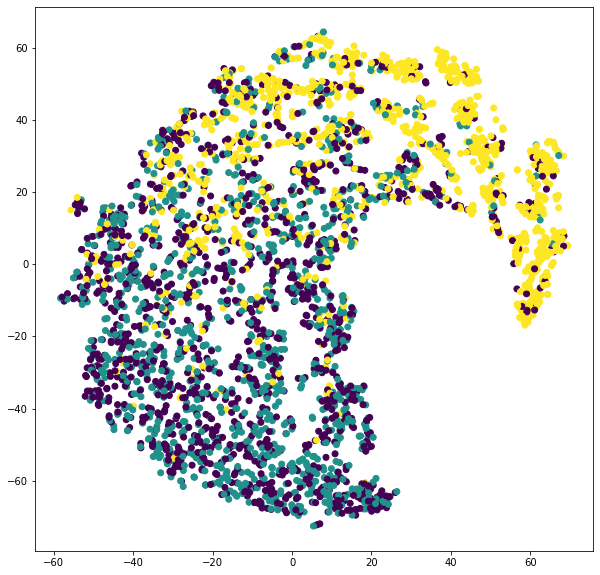

In [65]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=y_train)

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_train)
xTrain_transform=pca.transform(X_train)
xTest_transform=pca.transform(X_test)

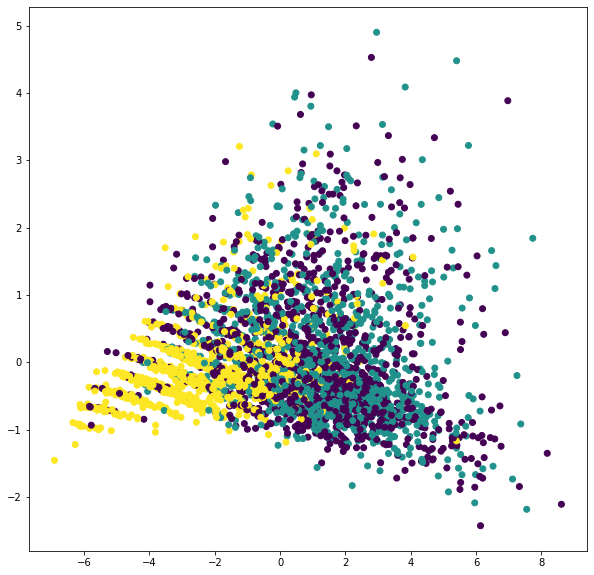

In [67]:
plt.figure(figsize=(10, 10))
plt.scatter(xTrain_transform[:, 0], xTrain_transform[:, 1], c=y_train)

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train,y_train)
xTrain_lda=lda.transform(X_train)

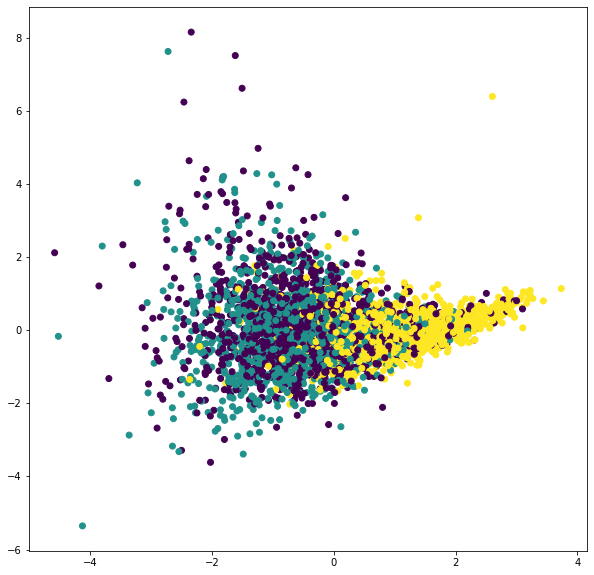

In [69]:
plt.figure(figsize=(10, 10))
plt.scatter(xTrain_lda[:, 0], xTrain_lda[:, 1], c=y_train)

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','poly','rbf','sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,scoring='accuracy',verbose=3,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.559, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.565, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.531, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.534, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.554, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.551, total=   1.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.549, total=   2.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.530, total=   1.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.520, total=   1.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.565, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.531, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.534, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.554, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.365, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.365, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.365, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.434, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.554, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.572, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.541, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.534, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.563, total=   0.2s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.524, total=   0.2s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.521, total=   0.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.510, total=   0.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.534, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.554, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.572, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.541, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.534, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.480, total=   0.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.446, total=   0.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.451, total=   0.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.445, total=   0.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.554, total=   0.6s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.572, total=   0.6s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.539, total=   0.6s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.535, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.546, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.541, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.521, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.510, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.534, total=   0.3s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.552, total=   2.8s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.542, total=   0.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.549, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.573, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.487, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.527, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.479, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.480, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.465, total=   3.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.527, total=   3.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.501, total=   3.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.477, total=   3.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.524, total=   3.2s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.414, total=   0.2s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.393, total=   0.3s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.559, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.573, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.549, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.538, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.568, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.559, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.576, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 1854.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [119]:
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.5647887323943662 corresponding to hyperparameters {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [120]:
model = SVC(C=1000, kernel='rbf',gamma=0.1)

In [121]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(model,X_train, X_test, y_train, y_test)

Accuracy on training set:
0.6633802816901408
Accuracy on testing set:
0.569377990430622
Classification Report:
              precision    recall  f1-score   support

           F       0.46      0.35      0.40       181
           I       0.72      0.80      0.76       214
           M       0.49      0.52      0.50       232

    accuracy                           0.57       627
   macro avg       0.56      0.56      0.55       627
weighted avg       0.56      0.57      0.56       627

Confusion Matrix:
[[ 64  18  99]
 [ 13 172  29]
 [ 61  50 121]]


In [122]:
train_and_evaluate(model,X_train1, X_test1, y_train1, y_test1)

Accuracy on training set:
0.6473239436619719
Accuracy on testing set:
0.5502392344497608
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.51      0.49       232
           1       0.43      0.32      0.37       181
           2       0.71      0.79      0.75       214

    accuracy                           0.55       627
   macro avg       0.53      0.54      0.53       627
weighted avg       0.54      0.55      0.54       627

Confusion Matrix:
[[118  64  50]
 [104  58  19]
 [ 32  13 169]]


## 2. Fitting Logistic Regression
Here again we will try to predict the same target variable as in the previous task. Use the same train and test sets as in the previous task.
1. Choose the best parameters for logistic regression model and report the accuracy and f1-score on the test set.
2. You know that logistic regression performs better on smaller number of dimensions. Try to reduce the number of dimensions in the dataset and again fit choose the best parameters for the logistic regression model and report the accuracy and f1-score on the test set.
3. Write a short paragraph comparing the results you got in task 1 and task 2, what do you think why you got that results?

In [123]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid =  {'C': [0.01,0.1,1, 10, 100, 1000], 'l1_ratio':[0,0.25,0.5,0.75,1] }
grid = GridSearchCV(logreg,param_grid,refit=True,scoring='accuracy',verbose=3,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.570, total=   0.1s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.579, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.535, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.534, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is onl

[CV] .................. C=0.01, l1_ratio=0, score=0.559, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.570, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.579, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.535, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.534, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.559, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elas

[CV] ................ C=0.01, l1_ratio=0.5, score=0.570, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.579, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.535, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.534, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.559, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.570, total=   0.0s

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elas


[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.579, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.535, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.534, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.559, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.570, total=   0.1s

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elas


[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.579, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.535, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.534, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.559, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=0, score=0.555, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.570, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.552, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=0, score=0.523, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.551, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.555, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.25, score=0.570, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.552, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.523, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.551, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=0.1, l1_ratio=0.5, score=0.555, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.570, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.552, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=0.1, l1_ratio=0.5, score=0.523, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.551, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.555, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.75, score=0.570, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.552, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.523, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.75, score=0.551, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.555, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.570, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=1, score=0.552, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.523, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.551, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ..................... C=1, l1_ratio=0, score=0.555, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.575, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ..................... C=1, l1_ratio=0, score=0.548, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.523, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.552, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1, l1_ratio=0.25, score=0.555, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.575, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1, l1_ratio=0.25, score=0.548, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.523, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1, l1_ratio=0.25, score=0.552, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.555, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=1, l1_ratio=0.5, score=0.575, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.548, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=1, l1_ratio=0.5, score=0.523, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.552, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1, l1_ratio=0.75, score=0.555, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.575, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1, l1_ratio=0.75, score=0.548, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.523, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.552, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ..................... C=1, l1_ratio=1, score=0.555, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.575, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ..................... C=1, l1_ratio=1, score=0.548, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.523, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ..................... C=1, l1_ratio=1, score=0.552, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.556, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................... C=10, l1_ratio=0, score=0.573, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.549, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.524, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.552, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.25, score=0.556, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.573, total=   0.2s
[CV] C=10, l1_ratio=0.25 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.25, score=0.549, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.524, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.25, score=0.552, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.556, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................. C=10, l1_ratio=0.5, score=0.573, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.549, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.524, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.552, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.75, score=0.556, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.573, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.75, score=0.549, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.524, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.75, score=0.552, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.556, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................... C=10, l1_ratio=1, score=0.573, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.549, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.524, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.552, total=   0.1s
[CV] C=100, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=100, l1_ratio=0, score=0.556, total=   0.1s
[CV] C=100, l1_ratio=0 ...............................................
[CV] ................... C=100, l1_ratio=0, score=0.575, total=   0.1s
[CV] C=100, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=100, l1_ratio=0, score=0.549, total=   0.1s
[CV] C=100, l1_ratio=0 ...............................................
[CV] ................... C=100, l1_ratio=0, score=0.524, total=   0.1s
[CV] C=100, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=100, l1_ratio=0, score=0.552, total=   0.1s
[CV] C=100, l1_ratio=0.25 ............................................
[CV] ................ C=100, l1_ratio=0.25, score=0.556, total=   0.1s
[CV] C=100, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=100, l1_ratio=0.25, score=0.575, total=   0.1s
[CV] C=100, l1_ratio=0.25 ............................................
[CV] ................ C=100, l1_ratio=0.25, score=0.549, total=   0.1s
[CV] C=100, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ................ C=100, l1_ratio=0.25, score=0.524, total=   0.2s
[CV] C=100, l1_ratio=0.25 ............................................
[CV] ................ C=100, l1_ratio=0.25, score=0.552, total=   0.1s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.556, total=   0.1s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.575, total=   0.1s
[CV] C=100, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

[CV] ................. C=100, l1_ratio=0.5, score=0.549, total=   0.1s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.524, total=   0.1s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.552, total=   0.1s
[CV] C=100, l1_ratio=0.75 ............................................
[CV] ................ C=100, l1_ratio=0.75, score=0.556, total=   0.1s
[CV] C=100, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=100, l1_ratio=0.75, score=0.575, total=   0.1s
[CV] C=100, l1_ratio=0.75 ............................................
[CV] ................ C=100, l1_ratio=0.75, score=0.549, total=   0.1s
[CV] C=100, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ................ C=100, l1_ratio=0.75, score=0.524, total=   0.1s
[CV] C=100, l1_ratio=0.75 ............................................
[CV] ................ C=100, l1_ratio=0.75, score=0.552, total=   0.1s
[CV] C=100, l1_ratio=1 ...............................................
[CV] ................... C=100, l1_ratio=1, score=0.556, total=   0.1s
[CV] C=100, l1_ratio=1 ...............................................
[CV] ................... C=100, l1_ratio=1, score=0.575, total=   0.1s
[CV] C=100, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=100, l1_ratio=1, score=0.549, total=   0.1s
[CV] C=100, l1_ratio=1 ...............................................
[CV] ................... C=100, l1_ratio=1, score=0.524, total=   0.1s
[CV] C=100, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=100, l1_ratio=1, score=0.552, total=   0.1s
[CV] C=1000, l1_ratio=0 ..............................................
[CV] .................. C=1000, l1_ratio=0, score=0.556, total=   0.1s
[CV] C=1000, l1_ratio=0 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1000, l1_ratio=0, score=0.575, total=   0.1s
[CV] C=1000, l1_ratio=0 ..............................................
[CV] .................. C=1000, l1_ratio=0, score=0.549, total=   0.1s
[CV] C=1000, l1_ratio=0 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1000, l1_ratio=0, score=0.524, total=   0.1s
[CV] C=1000, l1_ratio=0 ..............................................
[CV] .................. C=1000, l1_ratio=0, score=0.552, total=   0.1s
[CV] C=1000, l1_ratio=0.25 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ............... C=1000, l1_ratio=0.25, score=0.556, total=   0.1s
[CV] C=1000, l1_ratio=0.25 ...........................................
[CV] ............... C=1000, l1_ratio=0.25, score=0.575, total=   0.1s
[CV] C=1000, l1_ratio=0.25 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ............... C=1000, l1_ratio=0.25, score=0.549, total=   0.1s
[CV] C=1000, l1_ratio=0.25 ...........................................
[CV] ............... C=1000, l1_ratio=0.25, score=0.524, total=   0.1s
[CV] C=1000, l1_ratio=0.25 ...........................................
[CV] ............... C=1000, l1_ratio=0.25, score=0.552, total=   0.1s
[CV] C=1000, l1_ratio=0.5 ............................................
[CV] ................ C=1000, l1_ratio=0.5, score=0.556, total=   0.1s
[CV] C=1000, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=1000, l1_ratio=0.5, score=0.575, total=   0.1s
[CV] C=1000, l1_ratio=0.5 ............................................
[CV] ................ C=1000, l1_ratio=0.5, score=0.549, total=   0.1s
[CV] C=1000, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=1000, l1_ratio=0.5, score=0.524, total=   0.1s
[CV] C=1000, l1_ratio=0.5 ............................................
[CV] ................ C=1000, l1_ratio=0.5, score=0.552, total=   0.1s
[CV] C=1000, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ............... C=1000, l1_ratio=0.75, score=0.556, total=   0.1s
[CV] C=1000, l1_ratio=0.75 ...........................................
[CV] ............... C=1000, l1_ratio=0.75, score=0.575, total=   0.1s
[CV] C=1000, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ............... C=1000, l1_ratio=0.75, score=0.549, total=   0.1s
[CV] C=1000, l1_ratio=0.75 ...........................................
[CV] ............... C=1000, l1_ratio=0.75, score=0.524, total=   0.1s
[CV] C=1000, l1_ratio=0.75 ...........................................
[CV] ............... C=1000, l1_ratio=0.75, score=0.552, total=   0.1s
[CV] C=1000, l1_ratio=1 ..............................................
[CV] .................. C=1000, l1_ratio=1, score=0.556, total=   0.1s
[CV] C=1000, l1_ratio=1 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1000, l1_ratio=1, score=0.575, total=   0.1s
[CV] C=1000, l1_ratio=1 ..............................................
[CV] .................. C=1000, l1_ratio=1, score=0.549, total=   0.1s
[CV] C=1000, l1_ratio=1 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1000, l1_ratio=1, score=0.524, total=   0.1s
[CV] C=1000, l1_ratio=1 ..............................................
[CV] .................. C=1000, l1_ratio=1, score=0.552, total=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.3s finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [124]:
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.5554929577464789 corresponding to hyperparameters {'C': 0.01, 'l1_ratio': 0}


In [125]:
logreg = LogisticRegression(C=0.01)
train_and_evaluate(logreg,X_train, X_test, y_train, y_test)

Accuracy on training set:
0.5597183098591549
Accuracy on testing set:
0.5422647527910686
Classification Report:
              precision    recall  f1-score   support

           F       0.45      0.30      0.36       181
           I       0.67      0.77      0.71       214
           M       0.47      0.52      0.49       232

    accuracy                           0.54       627
   macro avg       0.53      0.53      0.52       627
weighted avg       0.53      0.54      0.53       627

Confusion Matrix:
[[ 55  25 101]
 [ 13 165  36]
 [ 54  58 120]]


In [94]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9)
pca.fit(X_train)
xTrain_transform=pca.transform(X_train)
xTest_transform=pca.transform(X_test)
xTrain_transform.shape

(3550, 2)

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
xTrain_lda=lda.transform(X_train)
xTest_lda=lda.transform(X_test)

In [97]:
#PCA
grid.fit(xTrain_transform,y_train)
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.558, total=   0.1s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.555, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.513, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.506, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.539, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................
[CV] ..... C=0.01, max_iter=100, tol=1e-05, score=0.558, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, max_iter=100, tol=1e-05, score=0.555, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................
[CV] ..... C=0.01, max_iter=100, tol=1e-05, score=0.513, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................
[CV] ..... C=0.01, max_iter=100, tol=1e-05, score=0.506, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................
[CV] ..... C=0.01, max_iter=100, tol=1e-05, score=0.539, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.558, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.555, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.513, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] .

[CV] .... C=0.01, max_iter=1000, tol=1e-05, score=0.558, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=1e-05 ................................
[CV] .... C=0.01, max_iter=1000, tol=1e-05, score=0.555, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=1e-05 ................................
[CV] .... C=0.01, max_iter=1000, tol=1e-05, score=0.513, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=1e-05 ................................
[CV] .... C=0.01, max_iter=1000, tol=1e-05, score=0.506, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=1e-05 ................................
[CV] .... C=0.01, max_iter=1000, tol=1e-05, score=0.539, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=0.001 ................................
[CV] .... C=0.01, max_iter=1000, tol=0.001, score=0.558, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=0.001 ................................
[CV] .... C=0.01, max_iter=1000, tol=0.001, score=0.555, total=   0.0s
[CV] C=0.01, max_iter=1000, tol=0.001 ................................
[CV] .

[CV] ...... C=0.1, max_iter=500, tol=1e-05, score=0.539, total=   0.0s
[CV] C=0.1, max_iter=500, tol=0.001 ..................................
[CV] ...... C=0.1, max_iter=500, tol=0.001, score=0.559, total=   0.0s
[CV] C=0.1, max_iter=500, tol=0.001 ..................................
[CV] ...... C=0.1, max_iter=500, tol=0.001, score=0.561, total=   0.0s
[CV] C=0.1, max_iter=500, tol=0.001 ..................................
[CV] ...... C=0.1, max_iter=500, tol=0.001, score=0.510, total=   0.0s
[CV] C=0.1, max_iter=500, tol=0.001 ..................................
[CV] ...... C=0.1, max_iter=500, tol=0.001, score=0.507, total=   0.0s
[CV] C=0.1, max_iter=500, tol=0.001 ..................................
[CV] ...... C=0.1, max_iter=500, tol=0.001, score=0.539, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=0.0001 ................................
[CV] .... C=0.1, max_iter=1000, tol=0.0001, score=0.559, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=0.0001 ................................
[CV] .

[CV] ...... C=1.0, max_iter=300, tol=0.001, score=0.507, total=   0.0s
[CV] C=1.0, max_iter=300, tol=0.001 ..................................
[CV] ...... C=1.0, max_iter=300, tol=0.001, score=0.541, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.0001 .................................
[CV] ..... C=1.0, max_iter=500, tol=0.0001, score=0.559, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.0001 .................................
[CV] ..... C=1.0, max_iter=500, tol=0.0001, score=0.562, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.0001 .................................
[CV] ..... C=1.0, max_iter=500, tol=0.0001, score=0.510, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.0001 .................................
[CV] ..... C=1.0, max_iter=500, tol=0.0001, score=0.507, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.0001 .................................
[CV] ..... C=1.0, max_iter=500, tol=0.0001, score=0.541, total=   0.0s
[CV] C=1.0, max_iter=500, tol=1e-05 ..................................
[CV] .

[CV] ...... C=10, max_iter=300, tol=0.0001, score=0.510, total=   0.0s
[CV] C=10, max_iter=300, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=300, tol=0.0001, score=0.507, total=   0.0s
[CV] C=10, max_iter=300, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=300, tol=0.0001, score=0.541, total=   0.0s
[CV] C=10, max_iter=300, tol=1e-05 ...................................
[CV] ....... C=10, max_iter=300, tol=1e-05, score=0.559, total=   0.0s
[CV] C=10, max_iter=300, tol=1e-05 ...................................
[CV] ....... C=10, max_iter=300, tol=1e-05, score=0.562, total=   0.0s
[CV] C=10, max_iter=300, tol=1e-05 ...................................
[CV] ....... C=10, max_iter=300, tol=1e-05, score=0.510, total=   0.0s
[CV] C=10, max_iter=300, tol=1e-05 ...................................
[CV] ....... C=10, max_iter=300, tol=1e-05, score=0.507, total=   0.0s
[CV] C=10, max_iter=300, tol=1e-05 ...................................
[CV] .

[CV] ...... C=100, max_iter=200, tol=1e-05, score=0.510, total=   0.0s
[CV] C=100, max_iter=200, tol=1e-05 ..................................
[CV] ...... C=100, max_iter=200, tol=1e-05, score=0.507, total=   0.0s
[CV] C=100, max_iter=200, tol=1e-05 ..................................
[CV] ...... C=100, max_iter=200, tol=1e-05, score=0.541, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.559, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.562, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.510, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.507, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] .

[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.507, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.541, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.559, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.562, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.510, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.507, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.541, total=   0.0s
[CV] C=1000, max_iter=200, tol=1e-05 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   10.1s finished


In [99]:
logreg = LogisticRegression(C=1)
train_and_evaluate(logreg,xTrain_transform, xTest_transform, y_train, y_test)


Accuracy on training set:
0.5340845070422535
Accuracy on testing set:
0.49920255183413076
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.54      0.47       232
           1       0.38      0.18      0.25       181
           2       0.67      0.72      0.69       214

    accuracy                           0.50       627
   macro avg       0.48      0.48      0.47       627
weighted avg       0.49      0.50      0.48       627

Confusion Matrix:
[[126  49  57]
 [128  33  20]
 [ 54   6 154]]


In [98]:
#LDA
grid.fit(xTrain_lda,y_train)
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.568, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.561, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.545, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.525, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=100, tol=0.0001, score=0.544, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................
[CV] ..... C=0.01, max_iter=100, tol=1e-05, score=0.568, total=   0.0s
[CV] C=0.01, max_iter=100, tol=1e-05 .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.568, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.561, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.545, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.525, total=   0.0s
[CV] C=0.01, max_iter=100, tol=0.001 .................................
[CV] ..... C=0.01, max_iter=100, tol=0.001, score=0.544, total=   0.0s
[CV] C=0.01, max_iter=200, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=200, tol=0.0001, score=0.568, total=   0.0s
[CV] C=0.01, max_iter=200, tol=0.0001 ................................
[CV] .... C=0.01, max_iter=200, tol=0.0001, score=0.561, total=   0.0s
[CV] C=0.01, max_iter=200, tol=0.0001 ................................
[CV] .

[CV] ..... C=0.1, max_iter=100, tol=0.0001, score=0.525, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.0001 .................................
[CV] ..... C=0.1, max_iter=100, tol=0.0001, score=0.548, total=   0.0s
[CV] C=0.1, max_iter=100, tol=1e-05 ..................................
[CV] ...... C=0.1, max_iter=100, tol=1e-05, score=0.562, total=   0.0s
[CV] C=0.1, max_iter=100, tol=1e-05 ..................................
[CV] ...... C=0.1, max_iter=100, tol=1e-05, score=0.576, total=   0.0s
[CV] C=0.1, max_iter=100, tol=1e-05 ..................................
[CV] ...... C=0.1, max_iter=100, tol=1e-05, score=0.544, total=   0.0s
[CV] C=0.1, max_iter=100, tol=1e-05 ..................................
[CV] ...... C=0.1, max_iter=100, tol=1e-05, score=0.525, total=   0.0s
[CV] C=0.1, max_iter=100, tol=1e-05 ..................................
[CV] ...... C=0.1, max_iter=100, tol=1e-05, score=0.548, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.001 ..................................
[CV] .

[CV] .... C=0.1, max_iter=1000, tol=0.0001, score=0.576, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=0.0001 ................................
[CV] .... C=0.1, max_iter=1000, tol=0.0001, score=0.544, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=0.0001 ................................
[CV] .... C=0.1, max_iter=1000, tol=0.0001, score=0.525, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=0.0001 ................................
[CV] .... C=0.1, max_iter=1000, tol=0.0001, score=0.548, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=1e-05 .................................
[CV] ..... C=0.1, max_iter=1000, tol=1e-05, score=0.562, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=1e-05 .................................
[CV] ..... C=0.1, max_iter=1000, tol=1e-05, score=0.576, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=1e-05 .................................
[CV] ..... C=0.1, max_iter=1000, tol=1e-05, score=0.544, total=   0.0s
[CV] C=0.1, max_iter=1000, tol=1e-05 .................................
[CV] .

[CV] ...... C=1.0, max_iter=500, tol=1e-05, score=0.525, total=   0.0s
[CV] C=1.0, max_iter=500, tol=1e-05 ..................................
[CV] ...... C=1.0, max_iter=500, tol=1e-05, score=0.548, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.001 ..................................
[CV] ...... C=1.0, max_iter=500, tol=0.001, score=0.565, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.001 ..................................
[CV] ...... C=1.0, max_iter=500, tol=0.001, score=0.577, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.001 ..................................
[CV] ...... C=1.0, max_iter=500, tol=0.001, score=0.545, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.001 ..................................
[CV] ...... C=1.0, max_iter=500, tol=0.001, score=0.525, total=   0.0s
[CV] C=1.0, max_iter=500, tol=0.001 ..................................
[CV] ...... C=1.0, max_iter=500, tol=0.001, score=0.548, total=   0.0s
[CV] C=1.0, max_iter=1000, tol=0.0001 ................................
[CV] .

[CV] ....... C=10, max_iter=300, tol=1e-05, score=0.546, total=   0.0s
[CV] C=10, max_iter=300, tol=0.001 ...................................
[CV] ....... C=10, max_iter=300, tol=0.001, score=0.565, total=   0.0s
[CV] C=10, max_iter=300, tol=0.001 ...................................
[CV] ....... C=10, max_iter=300, tol=0.001, score=0.577, total=   0.0s
[CV] C=10, max_iter=300, tol=0.001 ...................................
[CV] ....... C=10, max_iter=300, tol=0.001, score=0.545, total=   0.0s
[CV] C=10, max_iter=300, tol=0.001 ...................................
[CV] ....... C=10, max_iter=300, tol=0.001, score=0.525, total=   0.0s
[CV] C=10, max_iter=300, tol=0.001 ...................................
[CV] ....... C=10, max_iter=300, tol=0.001, score=0.546, total=   0.0s
[CV] C=10, max_iter=500, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=500, tol=0.0001, score=0.565, total=   0.0s
[CV] C=10, max_iter=500, tol=0.0001 ..................................
[CV] .

[CV] ...... C=100, max_iter=200, tol=1e-05, score=0.525, total=   0.0s
[CV] C=100, max_iter=200, tol=1e-05 ..................................
[CV] ...... C=100, max_iter=200, tol=1e-05, score=0.546, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.565, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.577, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.545, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.525, total=   0.0s
[CV] C=100, max_iter=200, tol=0.001 ..................................
[CV] ...... C=100, max_iter=200, tol=0.001, score=0.546, total=   0.0s
[CV] C=100, max_iter=300, tol=0.0001 .................................
[CV] .

[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.565, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.577, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.545, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.525, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ..... C=1000, max_iter=100, tol=0.001, score=0.546, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.565, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .... C=1000, max_iter=200, tol=0.0001, score=0.577, total=   0.0s
[CV] C=1000, max_iter=200, tol=0.0001 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    9.1s finished


In [100]:
logreg = LogisticRegression(C=1)
train_and_evaluate(logreg,xTrain_lda, xTest_lda, y_train, y_test)

Accuracy on training set:
0.5529577464788732
Accuracy on testing set:
0.5342902711323764
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48       232
           1       0.46      0.35      0.39       181
           2       0.67      0.72      0.70       214

    accuracy                           0.53       627
   macro avg       0.53      0.53      0.52       627
weighted avg       0.53      0.53      0.53       627

Confusion Matrix:
[[117  61  54]
 [ 96  63  22]
 [ 45  14 155]]


In [133]:
#SVM
train_and_evaluate(model,X_train, X_test, y_train, y_test)

Accuracy on training set:
0.5876056338028169
Accuracy on testing set:
0.5582137161084529
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       232
           1       0.42      0.24      0.30       181
           2       0.73      0.78      0.75       214

    accuracy                           0.56       627
   macro avg       0.54      0.54      0.53       627
weighted avg       0.55      0.56      0.54       627

Confusion Matrix:
[[140  51  41]
 [116  43  22]
 [ 39   8 167]]


In [134]:
#LogisticRegression
logreg = LogisticRegression(C=0.01)
train_and_evaluate(logreg,X_train, X_test, y_train, y_test)

Accuracy on training set:
0.5335211267605634
Accuracy on testing set:
0.529505582137161
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.62      0.52       232
           1       0.44      0.14      0.21       181
           2       0.67      0.76      0.71       214

    accuracy                           0.53       627
   macro avg       0.52      0.51      0.48       627
weighted avg       0.52      0.53      0.49       627

Confusion Matrix:
[[144  28  60]
 [136  25  20]
 [ 47   4 163]]


In [135]:
y_test.value_counts()

0    232
2    214
1    181
Name: Sex, dtype: int64

In [ ]:
'''Ինչպես երևում է վերևում բերված երկչափանի նկարներից մեր տվյալները հարմար չէ գծային ֆունկցիայով բաժանել կլաստերների,
բացի այդ չկան ակնհյտորեն առանձնացված տվյալների խմբեր: Այդ պատճառով, թե SVM-ի, թե Logistic Regression-ի 
Accuracy-ները բավական ցածր են:
Նաև անմիջապես վերևում երևում է, որ SVM-ի արդյունքները համեմատաբար ավելի լավն են քան Logistic Regression-ի արդյունքները, քանի որ ընտրել ենք 'kernel'-ը 'rbf':
Իմ կարծիքով վերևում բերված երկու մոդելներն էլ չեն ցուցադրել կիրառման համար լավ արդյունքներ:
  '''      